## Libraries Import

In [313]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency

## Data Import and Overview

In [314]:
df = pd.read_csv("C:\\Users\\podop\\Documents\\Marketing Analysis\\Final Project\\datasets\\Spotify_user_research.csv")

In [315]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,35~60,Others,More than 2 years,Smartphone,Family Plan-Rs 179/month,Yes,Family Plan-Rs 179/month,Podcast,Pop,Afternoon,Sadness or melancholy,Once a week,Recommendations,5,Daily,Comedy,NaN,NaN,Short (less than 15 minutes),Satisfied
1,20~35,Male,6 months to 1 year,Smart speakers or voice assistants,Family Plan-Rs 179/month,No,Family Plan-Rs 179/month,Podcast,Rock,Morning,Social gatherings or parties,Rarely,Recommendations,1,Once a week,Technology,Discussion,Both,Short (less than 15 minutes),Dissatisfied
2,12~20,Female,More than 2 years,Computer or laptop,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Morning,Relaxation and stress relief,Rarely,Recommendations,4,Several times a week,NaN,NaN,Both,Long (more than 30 minutes),Very Satisfied
3,12~20,Female,Less than 6 months,Computer or laptop,Student Plan-Rs 59/month,No,Individual Plan- Rs 119/month,Music,Rock,Night,Social gatherings or parties,Rarely,Playlists,5,Daily,NaN,NaN,Well known individuals,Medium (15-30 minutes),Satisfied
4,12~20,Male,1 year to 2 years,Smartphone,Individual Plan- Rs 119/month,Yes,NaN,Podcast,Pop,Evening,Social gatherings or parties,Once a week,Playlists,4,Rarely,NaN,Interview,Well known individuals,NaN,Very Satisfied


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28546 entries, 0 to 28545
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          28546 non-null  object
 1   Gender                       28546 non-null  object
 2   spotify_usage_period         28546 non-null  object
 3   spotify_listening_device     28546 non-null  object
 4   spotify_subscription_plan    28546 non-null  object
 5   premium_sub_willingness      28546 non-null  object
 6   preffered_premium_plan       20473 non-null  object
 7   preferred_listening_content  28546 non-null  object
 8   fav_music_genre              28546 non-null  object
 9   music_time_slot              28546 non-null  object
 10  music_Influencial_mood       28546 non-null  object
 11  music_lis_frequency          28546 non-null  object
 12  music_expl_method            28546 non-null  object
 13  music_recc_rating            28

In [317]:
df.isna().sum()

Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan         8073
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  5395
preffered_pod_format           7347
pod_host_preference            7385
preffered_pod_duration         6918
pod_variety_satisfaction          0
dtype: int64

In [318]:
df.nunique()

Age                             5
Gender                          3
spotify_usage_period            4
spotify_listening_device       16
spotify_subscription_plan       5
premium_sub_willingness         2
preffered_premium_plan          6
preferred_listening_content     2
fav_music_genre                13
music_time_slot                 4
music_Influencial_mood         15
music_lis_frequency            40
music_expl_method              21
music_recc_rating               5
pod_lis_frequency               5
fav_pod_genre                  19
preffered_pod_format            5
pod_host_preference             4
preffered_pod_duration          6
pod_variety_satisfaction        6
dtype: int64

In [319]:
df['music_lis_frequency'].unique()

array(['Once a week', 'Rarely', 'Never', 'Several times a week', 'Daily',
       'leisure time', 'Workout session', 'Study Hours, While Traveling',
       'Office hours, Workout session, leisure time', 'Office hours',
       'While Traveling, leisure time',
       'Office hours, While Traveling, Workout session',
       'Office hours, While Traveling',
       'Office hours, While Traveling, leisure time',
       'Social gatherings ', 'While Traveling',
       'While Traveling, Workout session, leisure time', 'Study Hours',
       'Study Hours, leisure time', 'While Traveling, Workout session',
       'Study Hours, Workout session, leisure time',
       'Office hours, While Traveling, ', 'Workout session, leisure time',
       'While Traveling, Workout session, leisure time, Night time, when cooking',
       'Office hours, While Traveling, Workout session, leisure time',
       'Study Hours, While Traveling, Workout session, leisure time',
       'Office hours, Study Hours, While Travel

## Data Filtering

In [320]:
# filter df by length of lis_frequency. Leave only those with one value which are relevant to frequency
df_short = df[df['music_lis_frequency'].str.split(', ').apply(len) == 1]
df_filtered = df_short[df_short['music_lis_frequency'].isin(['Never','Daily','Rarely','Once a week','Several times a week'])]

In [321]:
df_filtered.isna().sum()

Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan         4671
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  3627
preffered_pod_format           4649
pod_host_preference            4572
preffered_pod_duration         4660
pod_variety_satisfaction          0
dtype: int64

## Data Cleaning

In [322]:
df_filtered = df_filtered.replace("  ", np.nan)

In [323]:
# convert premium_sub_willingness column into boolean
df_filtered['premium_sub_willingness'] = df_filtered['premium_sub_willingness'].apply(lambda x: True if x=='Yes' else False)

In [324]:
# lowercase all text values 
df_filtered = df_filtered.applymap(lambda x: x.lower() if isinstance(x, str) else x)


C:\Users\podop\AppData\Local\Temp\ipykernel_13968\2481789981.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_filtered = df_filtered.applymap(lambda x: x.lower() if isinstance(x, str) else x)


## Feature Engineering

In [325]:
df_filtered['music_lis_frequency'].unique()

array(['once a week', 'rarely', 'never', 'several times a week', 'daily'],
      dtype=object)

In [326]:
# encode music_lis_frequency and pod_lis_frequency 
oe = OrdinalEncoder(categories = [['never','rarely','once a week','several times a week','daily']])
df_filtered['music_lis_frequency_num'] = oe.fit_transform(df_filtered[['music_lis_frequency']])
df_filtered['pod_lis_frequency_num'] = oe.fit_transform(df_filtered[['pod_lis_frequency']])
df_filtered[['music_lis_frequency_num','pod_lis_frequency_num']] = df_filtered[['music_lis_frequency_num','pod_lis_frequency_num']].astype(int)

In [327]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18637 entries, 0 to 18636
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          18637 non-null  object
 1   Gender                       18637 non-null  object
 2   spotify_usage_period         18637 non-null  object
 3   spotify_listening_device     18637 non-null  object
 4   spotify_subscription_plan    18637 non-null  object
 5   premium_sub_willingness      18637 non-null  bool  
 6   preffered_premium_plan       13966 non-null  object
 7   preferred_listening_content  18637 non-null  object
 8   fav_music_genre              18637 non-null  object
 9   music_time_slot              18637 non-null  object
 10  music_Influencial_mood       18637 non-null  object
 11  music_lis_frequency          18637 non-null  object
 12  music_expl_method            18637 non-null  object
 13  music_recc_rating            18637 n

In [328]:
# create numerical column for usage period
df_filtered['spotify_usage_period_num'] = df_filtered['spotify_usage_period'].map({'less than 6 months': '1','6 months to 1 year':'2','1 year to 2 years':'3','more than 2 years':'4'}).astype('int')

In [329]:
# create binary column for subscription plan
df_filtered['spotify_subscription_plan_binary'] = df_filtered['spotify_subscription_plan'].apply(lambda x: 'free' if x=='free (ad-supported)' else 'premium')
df_filtered['spotify_subscription_plan_binary'] = df_filtered['spotify_subscription_plan_binary'].apply(lambda x: 1 if x=='premium' else 0)

In [330]:
# replace missing values in preferred premium plan with actual premium plan if person already has it
def preferred_premium(row):
    premium_plans = ['family plan-rs 179/month', 'student plan-rs 59/month', 'individual plan- rs 119/month']
    if pd.isna(row['preffered_premium_plan']) and row['spotify_subscription_plan'] in premium_plans:
        return row['spotify_subscription_plan']
    else:
        return row['preffered_premium_plan']
df_filtered['preffered_premium_plan'] = df_filtered.apply(preferred_premium,axis = 1)

In [331]:
# create dataframes for mismatch in preferred and actual listening frequency
df_mismatch_music= df_filtered[(df_filtered['preferred_listening_content']=='music') & (df_filtered['pod_lis_frequency_num']>df_filtered['music_lis_frequency_num'])]
df_mismatch_podcast = df_filtered[(df_filtered['preferred_listening_content']=='podcast') & (df_filtered['music_lis_frequency_num']>df_filtered['pod_lis_frequency_num'])]

In [332]:
# create new column with mismathc status
def detect_mismatch(row):
    if row['preferred_listening_content'] == 'music' and row['pod_lis_frequency_num'] > row['music_lis_frequency_num']:
        return 'mismatch: prefers music'
    elif row['preferred_listening_content'] == 'podcast' and row['music_lis_frequency_num'] > row['pod_lis_frequency_num']:
        return 'mismatch: prefers podcasts'
    else:
        return 'no mismatch'
df_filtered['mismatch_status'] = df_filtered.apply(detect_mismatch,axis = 1)

## Univariate Analysis

([<matplotlib.axis.XTick at 0x13599e88920>,
 [Text(0, 0, 'premium'), Text(1, 0, 'free')])

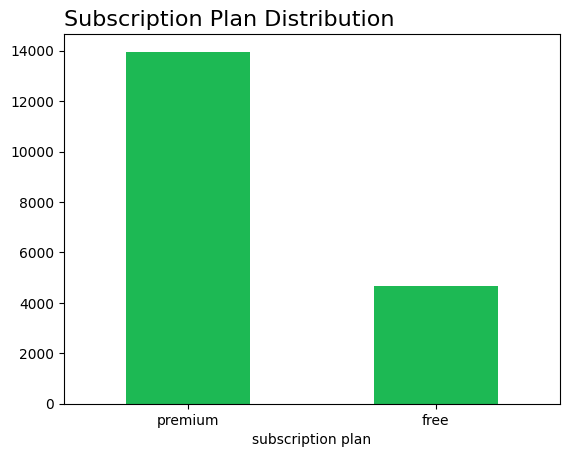

In [333]:
df_filtered['spotify_subscription_plan_binary'].value_counts().plot(kind = 'bar', color = ("#1DB954") )
plt.title("Subscription Plan Distribution", fontsize=16, loc = 'left')
plt.xlabel('subscription plan')
plt.xticks(ticks = [0,1], labels = ['premium', 'free'],rotation = 0)

Text(0.5, 0, 'mismatch status')

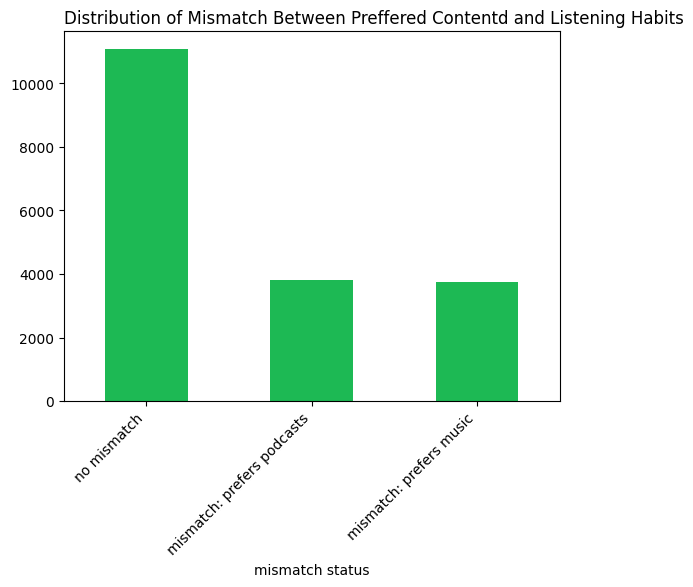

In [334]:
df_filtered['mismatch_status'].value_counts().plot(kind = 'bar', color = ("#1DB954"))
plt.title('Distribution of Mismatch Between Preffered Contentd and Listening Habits', loc = 'left')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('mismatch status')

## Bivariant Analysis

Text(0.5, 0, 'music genre')

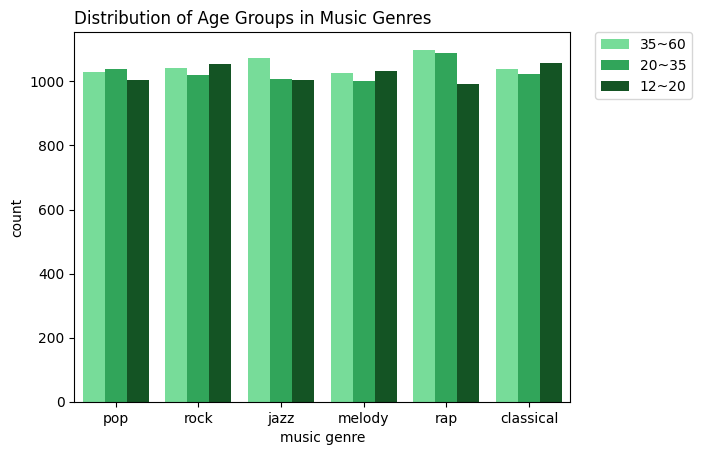

In [335]:
spotify_short = ['#66ed93', '#1DB954', '#0a5e1f']
sns.countplot(data = df_filtered, x='fav_music_genre', hue ='Age', palette = spotify_short)
plt.title('Distribution of Age Groups in Music Genres', loc = 'left')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xlabel('music genre')

Text(0.5, 0, 'music genre')

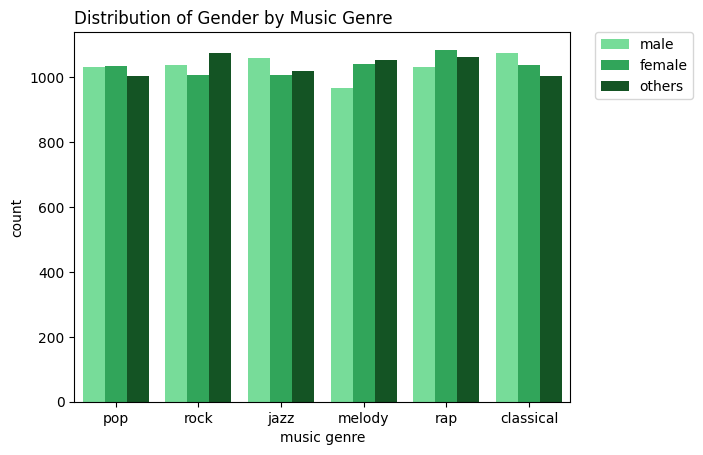

In [336]:
sns.countplot(data = df_filtered, x = 'fav_music_genre', hue = 'Gender', hue_order= ['male','female','others'], palette = spotify_short)
plt.title('Distribution of Gender by Music Genre', loc = 'left')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)
plt.xlabel('music genre')

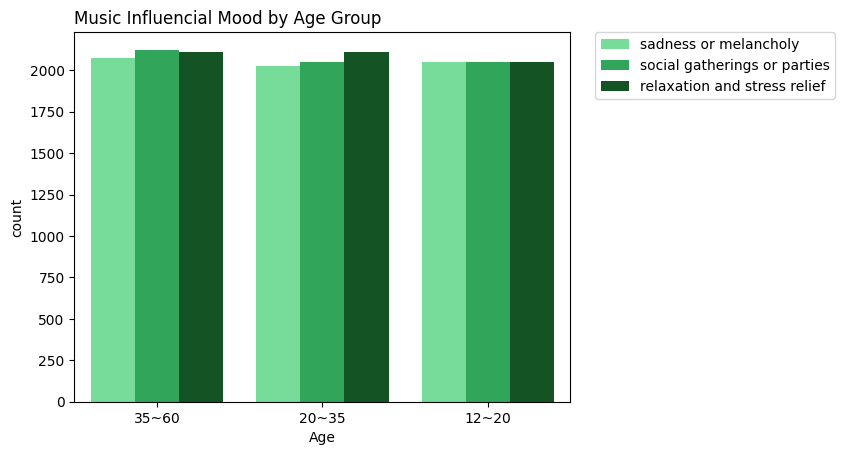

In [337]:
sns.countplot(data = df_filtered, x = 'Age', hue = 'music_Influencial_mood', palette = spotify_short)
plt.title('Music Influencial Mood by Age Group', loc = 'left')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left',borderaxespad = 0)

C:\Users\podop\AppData\Local\Temp\ipykernel_13968\3871283673.py:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.countplot(data = df_filtered, x = 'Age', hue = 'music_time_slot', hue_order = time_order, palette = spotify_palette)


Text(0.5, 0, 'time slot')

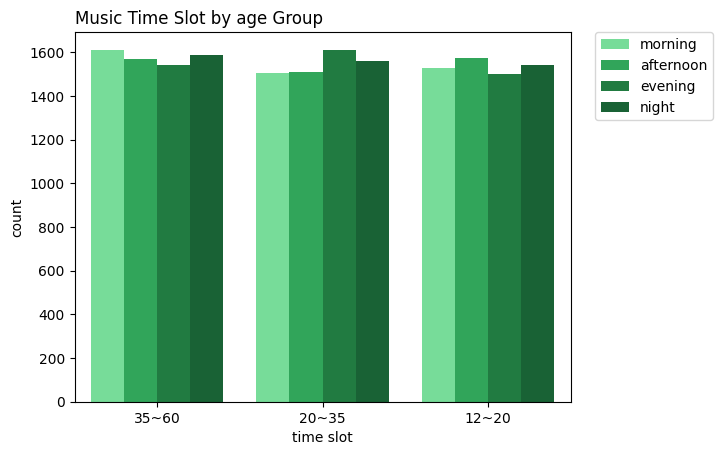

In [338]:
spotify_palette = ['#66ed93','#1DB954', '#128a3c', '#0d6e32', '#0a5e1f']
time_order = ['morning','afternoon','evening','night']
sns.countplot(data = df_filtered, x = 'Age', hue = 'music_time_slot', hue_order = time_order, palette = spotify_palette)
plt.title('Music Time Slot by age Group', loc = 'left')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left', borderaxespad = 0)
plt.xlabel('time slot')

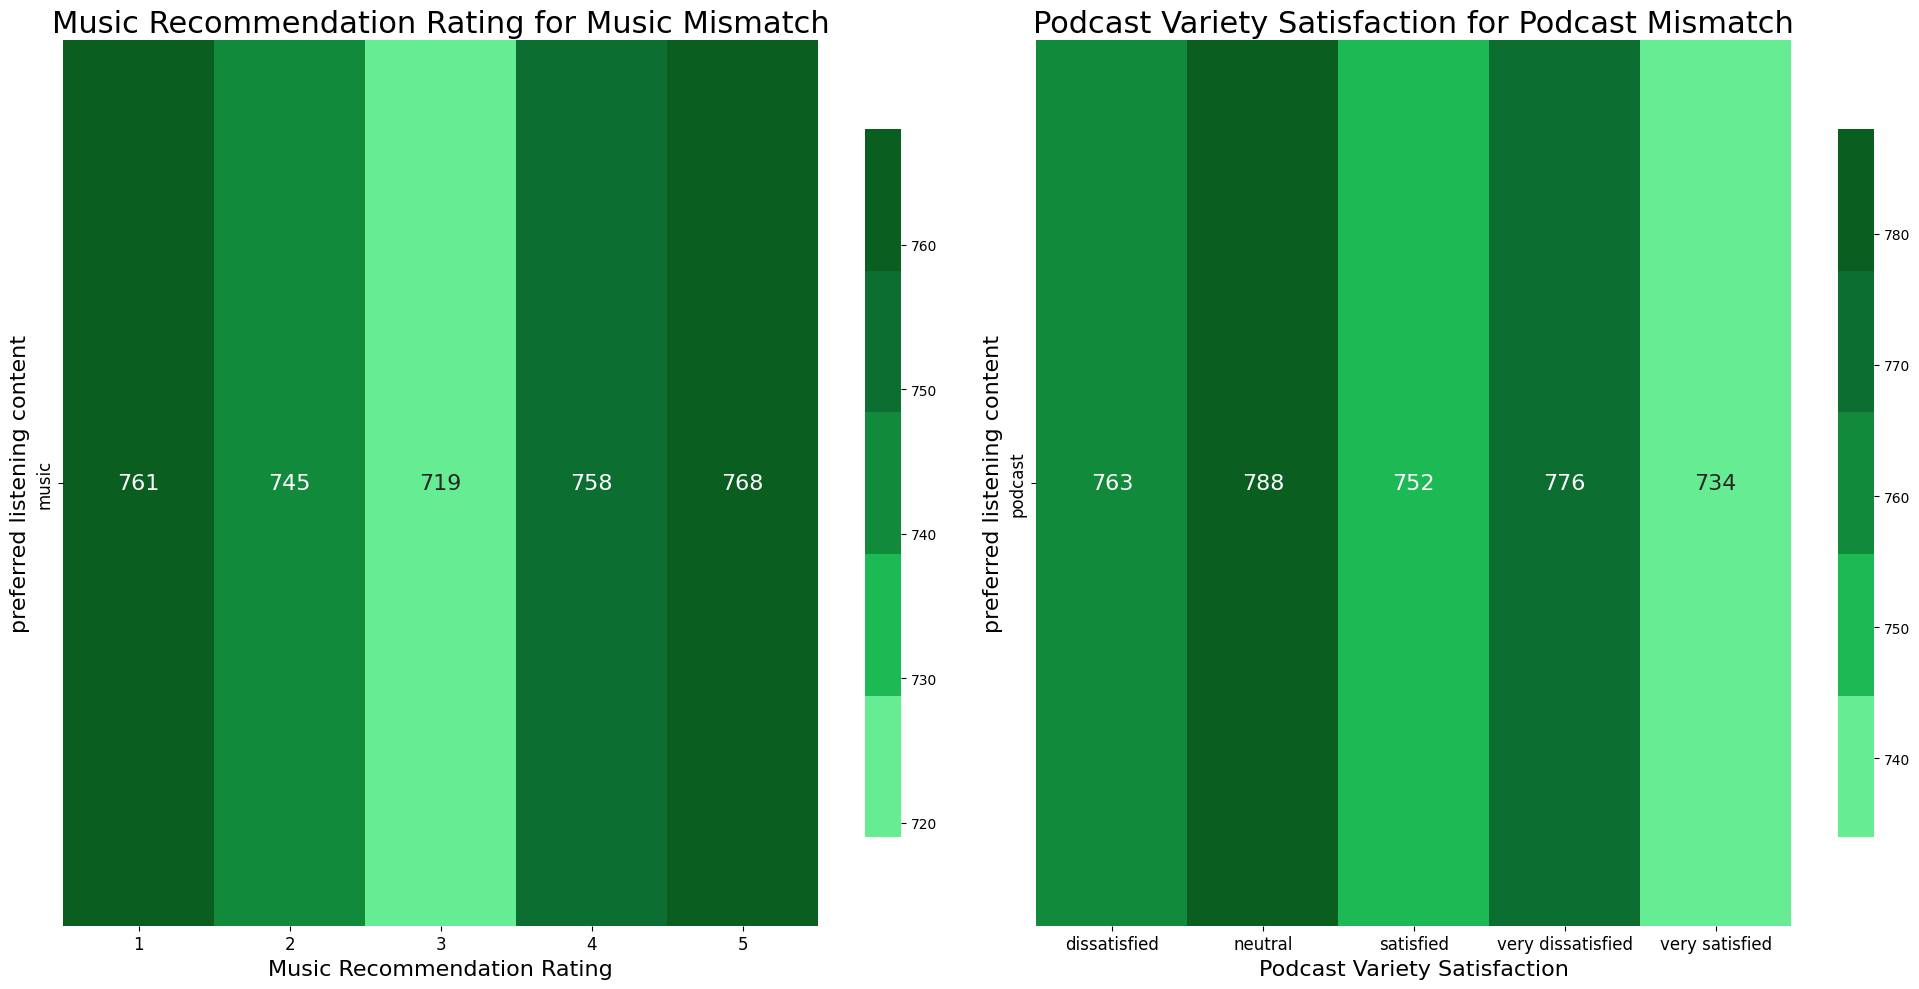

In [339]:
# heatmap for music mismatch
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=False)
mismatch_heatmap_m = df_mismatch_music.groupby(['preferred_listening_content', 'music_recc_rating']).size().unstack(fill_value=0)
sns.heatmap(mismatch_heatmap_m, annot=True, annot_kws={'size':16}, cmap=spotify_palette, cbar=True, fmt="d", ax=axes[0], cbar_kws={'shrink': 0.8})
axes[0].set_title('Music Recommendation Rating for Music Mismatch', fontsize=22, loc='center')
axes[0].set_xlabel('Music Recommendation Rating', fontsize=16)
axes[0].set_ylabel('preferred listening content', fontsize=16)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# heatmap for podcast mismatch
mismatch_heatmap_p = df_mismatch_podcast.groupby(['preferred_listening_content', 'pod_variety_satisfaction']).size().unstack(fill_value=0)
sns.heatmap(mismatch_heatmap_p, annot=True, annot_kws={'size':16}, cmap=spotify_palette, cbar=True, fmt="d", ax=axes[1], cbar_kws={'shrink': 0.8})
axes[1].set_title('Podcast Variety Satisfaction for Podcast Mismatch', fontsize=22, loc='center')
axes[1].set_xlabel('Podcast Variety Satisfaction', fontsize=16)
axes[1].set_ylabel('preferred listening content', fontsize=16)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
plt.tight_layout()
plt.show()

In [340]:
# detect the percentage of people with low recomendation or variety satisfaction for mismatched users
low_rating = df_mismatch_music[df_mismatch_music['music_recc_rating'].isin([1,2])].shape[0]
all_music_mimatch = df_mismatch_music.shape[0]
low_rating_percent = low_rating/all_music_mimatch*100
print(f'{low_rating_percent:.0f}% of users among those with music mismatch, have low music reccommendation rating')
low_stisfaction = df_mismatch_podcast[df_mismatch_podcast['pod_variety_satisfaction'].isin(['dissatisfied','very dissatisfied'])].shape[0]
all_podcast_mismatch = df_mismatch_podcast.shape[0]
low_satisfaction_percent = low_stisfaction/all_podcast_mismatch*100
print(f'{low_satisfaction_percent:.0f}% of users among those with podcast mismatch have low podcast variety satisfaction')

40% of users among those with music mismatch, have low music reccommendation rating
40% of users among those with podcast mismatch have low podcast variety satisfaction


## Chi-Square Test of Independence

H0: There is no dependancy between music recomendation rating and music listening frequency. They are independent.<br>H1: There is dependancy between music recommendation rating and music listening frequency. The music listening frequency depends on music recommendation rating.

In [341]:
# create contingency table for music
chi_square_music = df_filtered[['music_lis_frequency','music_recc_rating']]
contingency_table_music = pd.crosstab(chi_square_music['music_lis_frequency'], chi_square_music['music_recc_rating'])
contingency_table_music

music_recc_rating,1,2,3,4,5
music_lis_frequency,,,,,
daily,753,710,773,777,752
never,769,709,766,724,736
once a week,755,711,692,712,803
rarely,783,746,717,748,786
several times a week,731,707,741,777,759


In [342]:
# apply chi-square test of independence for music
chi2, p, dof, expected = chi2_contingency(contingency_table_music)
print(f"P-Value: {p}")

P-Value: 0.43932745204080553


H0: There is no dependancy between podcast variety satisfection and podcast listening frequency. They are independent.<br>H1: There is dependancy between podcast variety satisfection and podcast listening frequency. The podcast listening frequency depends on podcast variety satisfection.

In [343]:
# create contingency table for podcast
chi_square_podcast = df_filtered[['pod_lis_frequency','pod_variety_satisfaction']]
contingency_table_podcast = pd.crosstab(chi_square_podcast['pod_lis_frequency'], chi_square_podcast['pod_variety_satisfaction'])
contingency_table_podcast

pod_variety_satisfaction,dissatisfied,neutral,satisfied,very dissatisfied,very satisfied
pod_lis_frequency,,,,,
daily,762,755,751,737,739
never,768,738,727,763,739
once a week,737,746,768,702,712
rarely,751,775,758,762,719
several times a week,792,730,743,724,739


In [344]:
# apply chi-square test of independence for podcast
chi2, p, dof, expected = chi2_contingency(contingency_table_podcast)
print(f"P-Value: {p}")

P-Value: 0.942688993154252


Since both p-values are very high we fil to reject null hypothesis. There is no dependency between music recommendation rating and music listening frequency as well as between podcast variety satisfection and podcast listening frequency.

## Customer Segmentation

In [345]:
# create segments based on music_lis_frequency and pod_lis_frequency
def segment_user(row):
    if row['music_lis_frequency_num'] >= 3 and row['pod_lis_frequency_num'] <= 1:
        return 'music enthusiast'
    elif row['pod_lis_frequency_num'] >= 3 and row['music_lis_frequency_num'] <= 1:
        return 'podcast enthusiast'
    elif row['music_lis_frequency_num'] >= 3 and row['pod_lis_frequency_num'] >= 3:
        return 'music & podcast enthusiast'
    elif row['music_lis_frequency_num'] >= 2 and row['pod_lis_frequency_num'] >= 2:
        return 'balanced listener'
    elif row['music_lis_frequency_num'] == 1 and row['pod_lis_frequency_num'] == 1:
        return 'occasional listener'
    elif row['music_lis_frequency_num'] == 0 and row['pod_lis_frequency_num'] == 0:
        return 'infrequent listener'
    elif row['music_lis_frequency_num'] > row['pod_lis_frequency_num']:
        return 'music dominant'
    elif row['pod_lis_frequency_num'] > row['music_lis_frequency_num']:
        return 'podcast dominant'
    else:
        return 'balanced'

df_filtered['content_segment'] = df_filtered.apply(segment_user, axis=1)


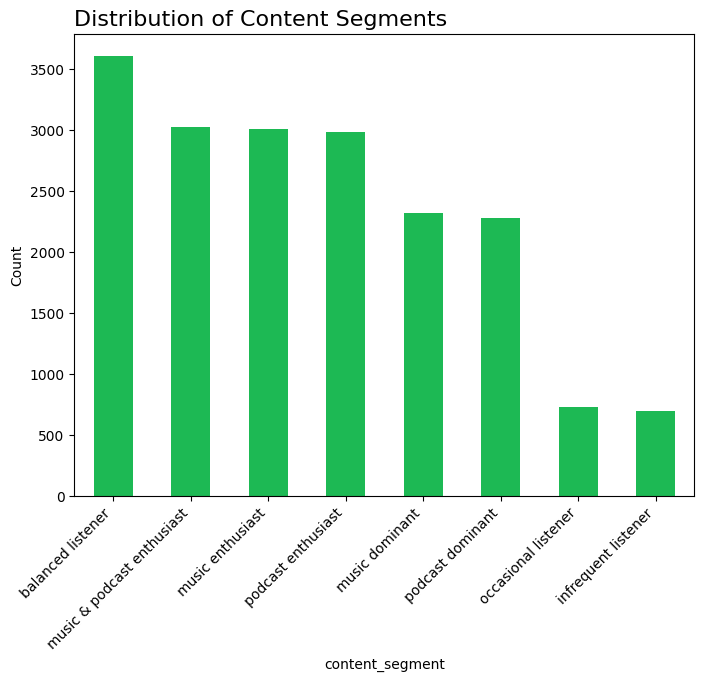

In [346]:
# plot created segments
category_counts = df_filtered['content_segment'].value_counts()
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar',  color=("#1DB954"))
plt.title('Distribution of Content Segments', fontsize=16,loc = 'left')
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45, ha = 'right')
plt.show()

## KMeans Clustering

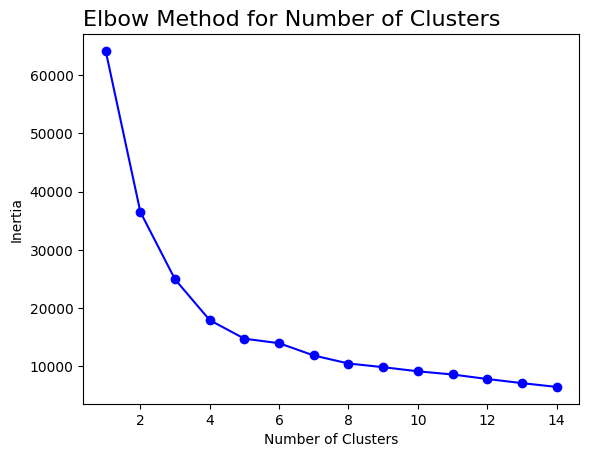

In [347]:
# define optimal number of clusters with elbow method
df_filtered['music_time_slot_num'] = df_filtered['music_time_slot'].map({'morning': 1,'afternoon':2, 'evening':3,'night':4})
df_cluster = df_filtered[['spotify_subscription_plan_binary','music_lis_frequency_num','spotify_usage_period_num']]

inertia = []
k_num = range(1,15)
for k in k_num:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)

plt.plot(k_num, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Number of Clusters', fontsize=16,loc = 'left')
plt.show()

In [348]:
# apply K-means to create clusters of users based on usage period, subscription plan, music listening frequency
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
kmeans = KMeans(n_clusters = 5,random_state = 0)
df_filtered['cluster'] = kmeans.fit_predict(df_scaled)

cluster_summary = df_filtered.groupby('cluster')[['spotify_subscription_plan_binary','music_lis_frequency_num','spotify_usage_period_num']].mean()
cluster_summary

,spotify_subscription_plan_binary,music_lis_frequency_num,spotify_usage_period_num
cluster,,,
0,1.0,2.218008,3.550438
1,1.0,0.391756,1.817527
2,0.0,1.997016,3.505968
3,1.0,2.997154,1.496799
4,0.0,2.030043,1.485408


In [349]:
# assign names for clusters
df_filtered['cluster'] = df_filtered['cluster'].map({0: 'loyal premium', 1: 'low-engagement premium starters', 2: 'loyal free', 3: 'engaged premium starters', 4: 'engaged free starters'})

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'loyal premium'),
  Text(1, 0, 'engaged premium starters'),
  Text(2, 0, 'low-engagement premium starters'),
  Text(3, 0, 'loyal free'),
  Text(4, 0, 'engaged free starters')])

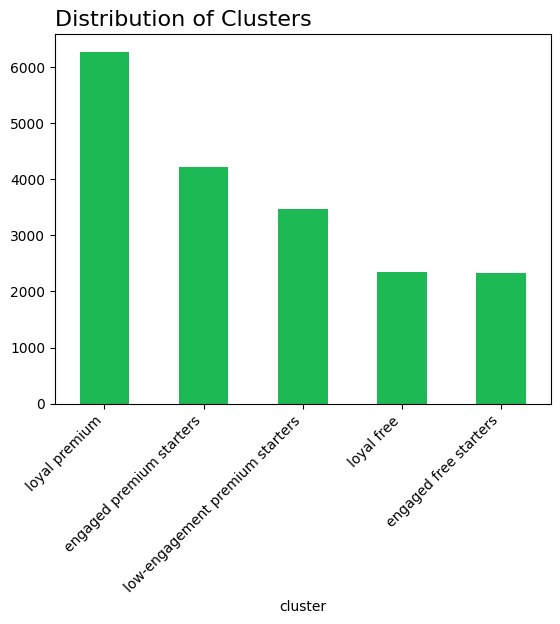

In [350]:
# plot created clusters
count = df_filtered['cluster'].value_counts()
count.plot(kind = 'bar', color = "#1DB954")
plt.title('Distribution of Clusters', fontsize = 16, loc = 'left')
plt.xticks(rotation = 45, ha = 'right')

## Behavioral Analysis

Text(0.0, 1.0, 'Segment Count by Cluster')

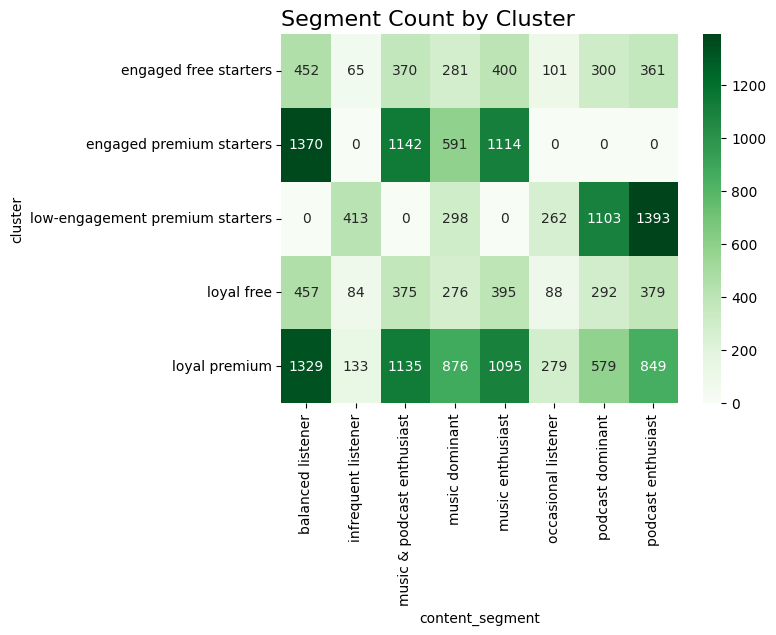

In [351]:
cluster_segment_counts = df_filtered.groupby(['cluster', 'content_segment']).size().unstack(fill_value=0)
sns.heatmap(cluster_segment_counts,annot=True, cmap = 'Greens',cbar=True, fmt="d")
plt.title('Segment Count by Cluster', fontsize = 16, loc= 'left')

Text(0.0, 1.0, 'Podcast Variety Satisfaction for Podcast Enthusiast\nand Podcast Dominant Segments')

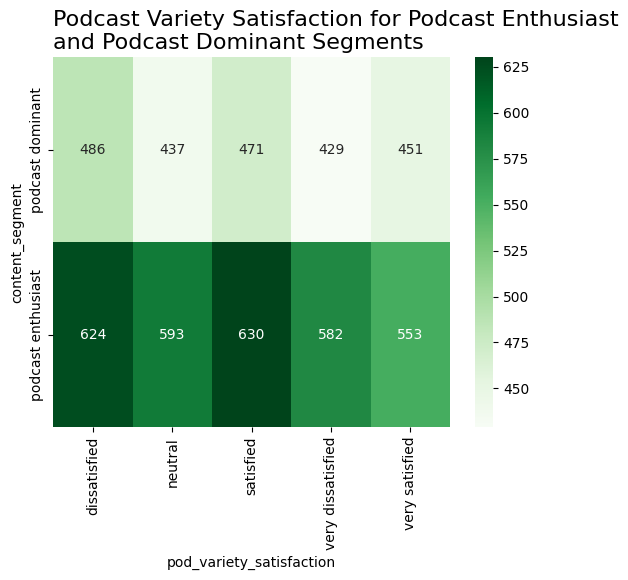

In [352]:
podcast_df = df_filtered[df_filtered['content_segment'].isin(['podcast enthusiast','podcast dominant'])]
satisfaction_df = podcast_df.groupby(['content_segment','pod_variety_satisfaction']).size().unstack(fill_value=0)
sns.heatmap(satisfaction_df, annot=True, cmap = 'Greens',cbar=True, fmt="d")
plt.title(f'Podcast Variety Satisfaction for Podcast Enthusiast\nand Podcast Dominant Segments', fontsize = 16, loc = 'left')


C:\Users\podop\AppData\Local\Temp\ipykernel_13968\1347640876.py:1: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(data = df_filtered, x = 'cluster', hue = 'Age', palette = spotify_palette)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'loyal premium'),
  Text(1, 0, 'low-engagement premium starters'),
  Text(2, 0, 'loyal free'),
  Text(3, 0, 'engaged premium starters'),
  Text(4, 0, 'engaged free starters')])

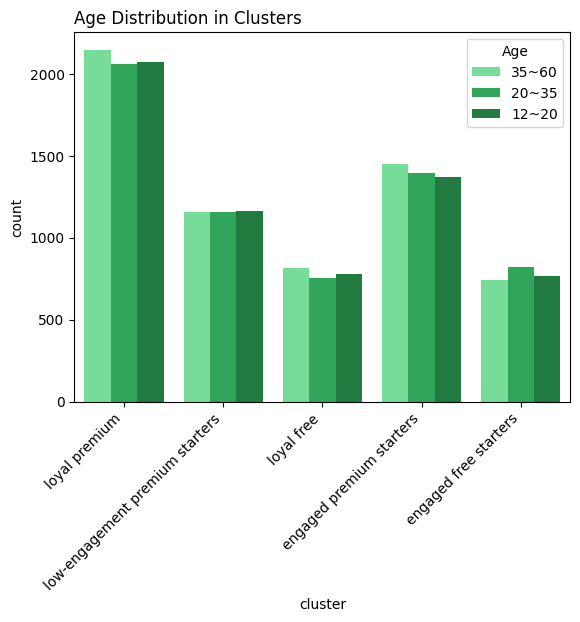

In [353]:
sns.countplot(data = df_filtered, x = 'cluster', hue = 'Age', palette = spotify_palette)
plt.title('Age Distribution in Clusters', loc = 'left')
plt.xticks(rotation = 45, ha = 'right')

([], [])

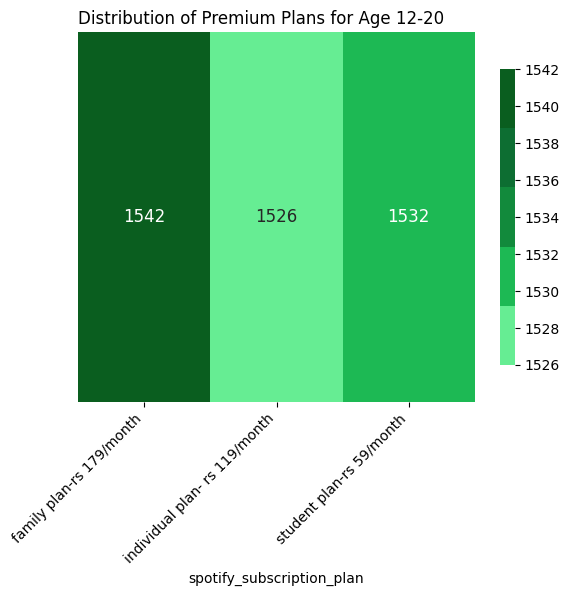

In [354]:
age_12_20 = df_filtered[(df_filtered['Age']== '12~20')&(df_filtered['spotify_subscription_plan_binary']==1)]
age_heatmap = age_12_20.groupby(['Age','spotify_subscription_plan']).size().unstack(fill_value = 0)
sns.heatmap(age_heatmap, annot=True, annot_kws={'size':12}, cmap=spotify_palette, cbar=True, fmt="d", cbar_kws={'shrink': 0.8})
plt.title('Distribution of Premium Plans for Age 12-20', loc = 'left')
plt.xticks(rotation = 45, ha = 'right')
plt.ylabel(' ')
plt.yticks([])


C:\Users\podop\AppData\Local\Temp\ipykernel_13968\1977018640.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Age', hue='spotify_usage_period', data=df_filtered[df_filtered['cluster'] =='loyal free'], ax=axes[0], palette = spotify_short, order = (
C:\Users\podop\AppData\Local\Temp\ipykernel_13968\1977018640.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='Age', hue='spotify_usage_period', data=df_filtered[df_filtered['cluster'] =='loyal premium'], ax=axes[1], palette = spotify_short, order= (


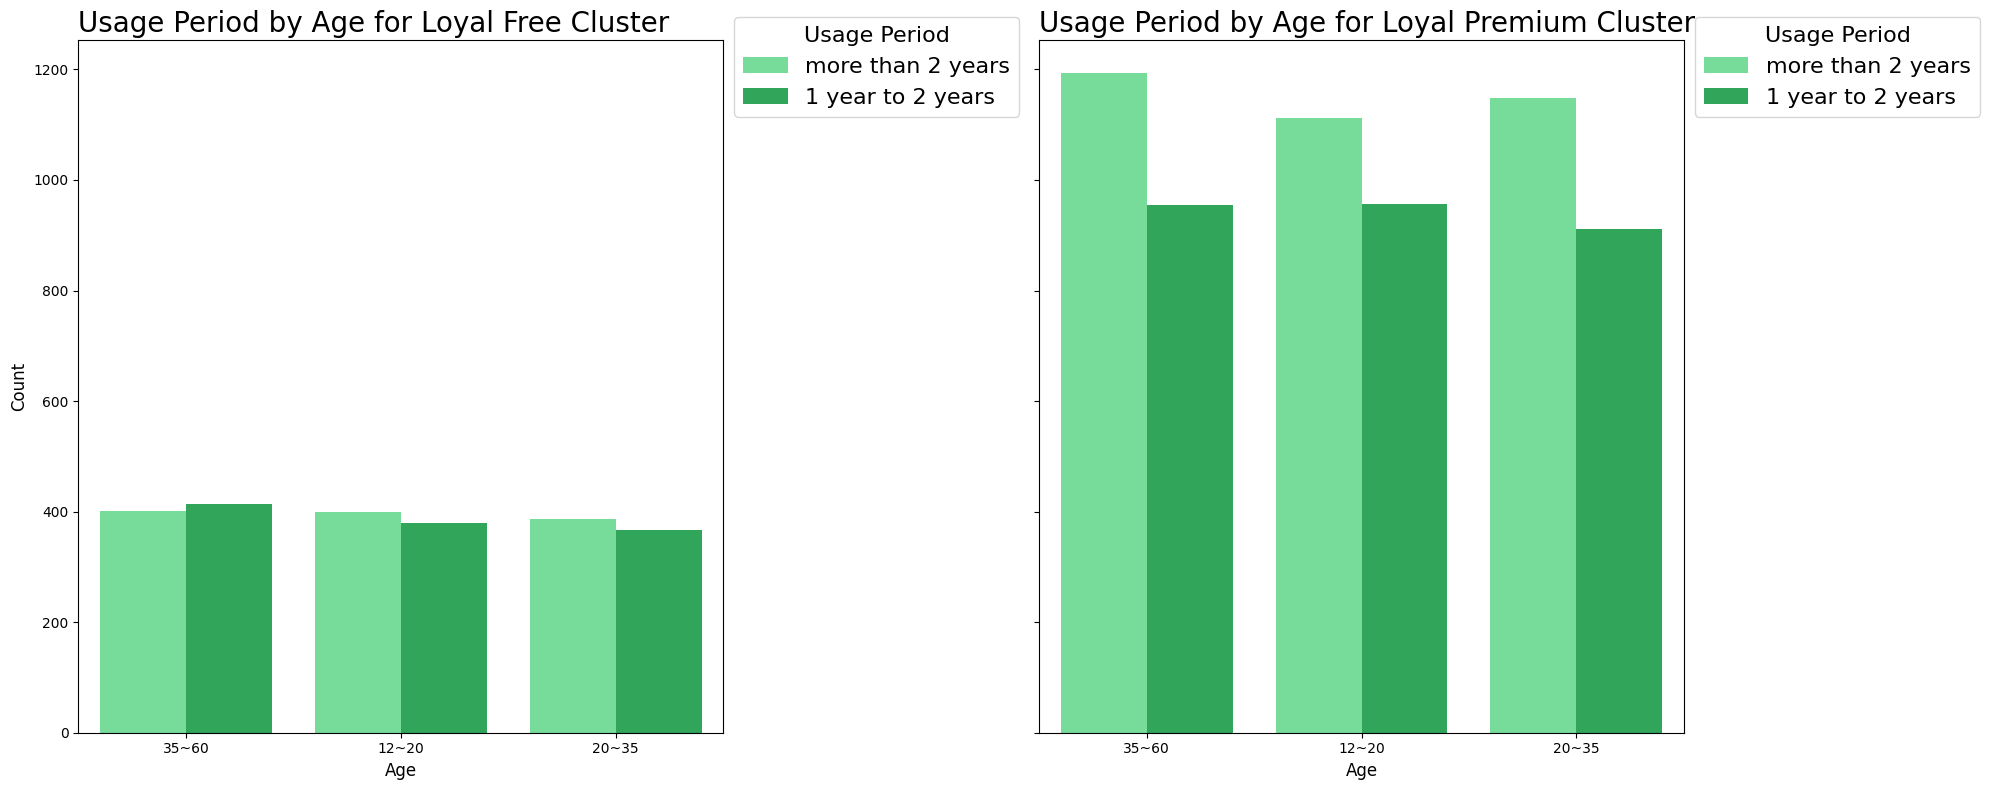

In [355]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)
# loyal free
sns.countplot(x='Age', hue='spotify_usage_period', data=df_filtered[df_filtered['cluster'] =='loyal free'], ax=axes[0], palette = spotify_short, order = (
    df_filtered[df_filtered['cluster'] == 'loyal free']
    .groupby('Age').size()
    .sort_values(ascending=False).index
))
axes[0].set_title('Usage Period by Age for Loyal Free Cluster',fontsize = 20, loc = 'left')
axes[0].set_xlabel('Age',fontsize = 12)
axes[0].set_ylabel('Count',fontsize = 12)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1.05), title='Usage Period', title_fontsize = 16,fontsize = 16)

#loyal premium
sns.countplot(x='Age', hue='spotify_usage_period', data=df_filtered[df_filtered['cluster'] =='loyal premium'], ax=axes[1], palette = spotify_short, order= (
    df_filtered[df_filtered['cluster'] == 'loyal premium']
    .groupby('Age').size()
    .sort_values(ascending=False).index
))
axes[1].set_title('Usage Period by Age for Loyal Premium Cluster', fontsize = 20, loc = 'left')
axes[1].set_xlabel('Age', fontsize = 12)

axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1.05), title='Usage Period',title_fontsize = 16,fontsize = 16)

plt.tight_layout()
plt.show()

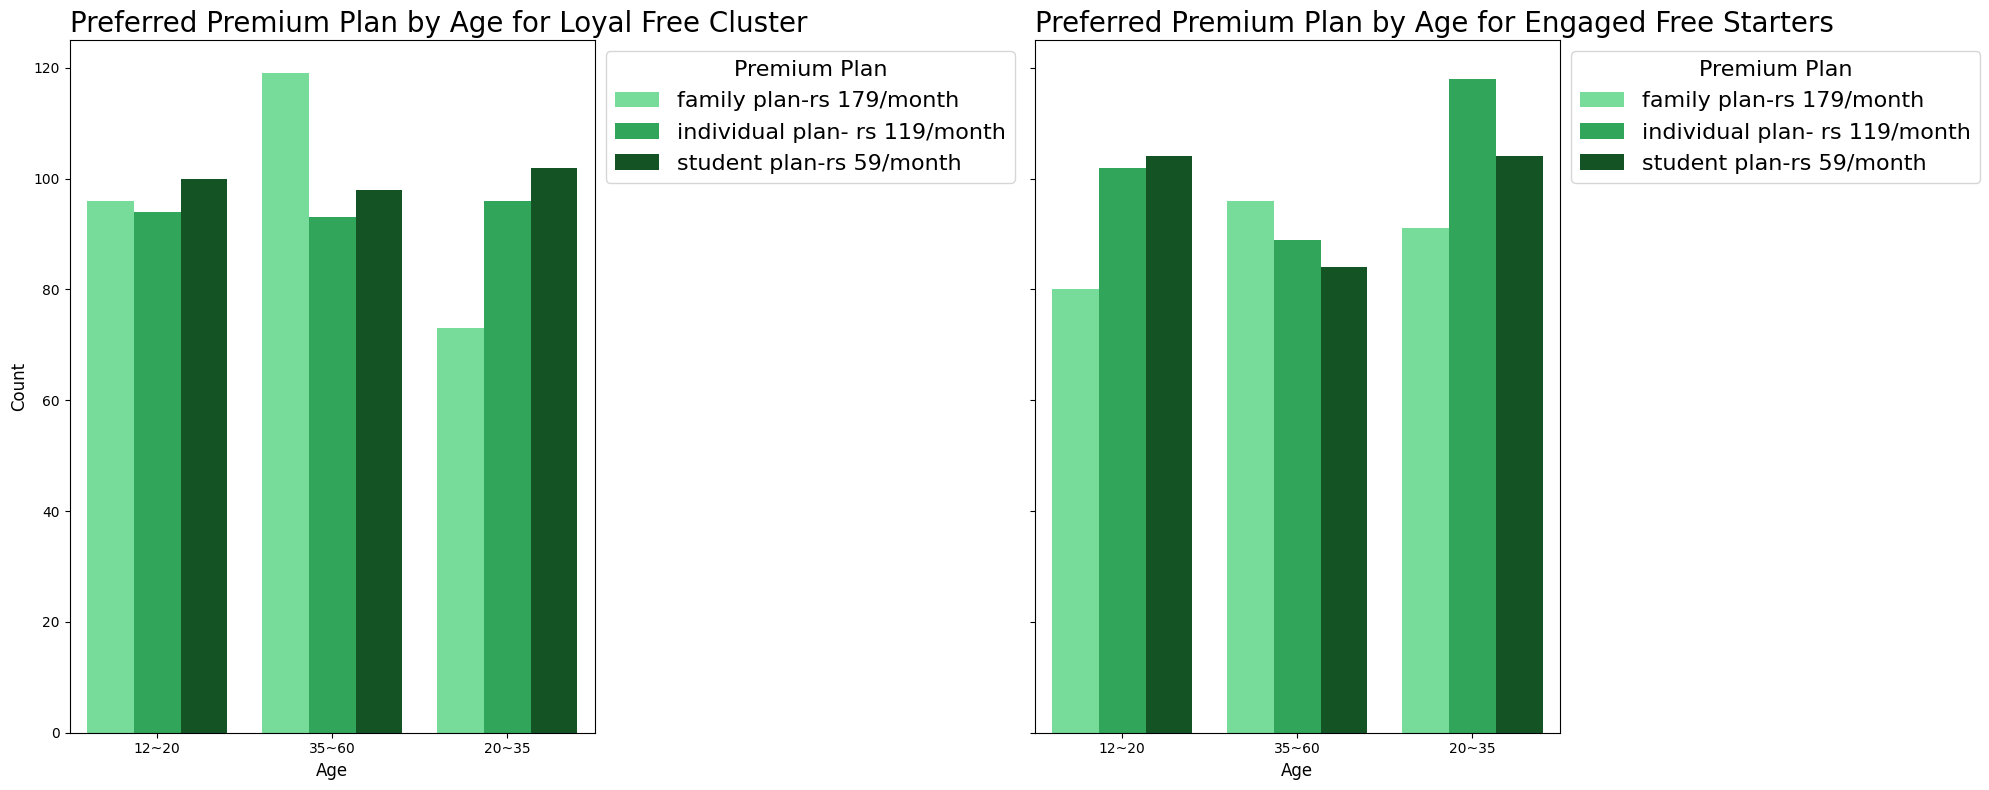

In [356]:
# Filter 'loyal free' and 'engaged free starters' clusters where premium_subwillingness is 1
df_filtered_clusters = df_filtered[(df_filtered['cluster'].isin(['loyal free', 'engaged free starters'])) & 
                                   (df_filtered['premium_sub_willingness'] == 1)]
green_palette = ['#2ca02c', '#4daf4a', '#6fa36b']
premium_plan_order = ['family plan-rs 179/month','individual plan- rs 119/month','student plan-rs 59/month']
# subplot
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

# "Free Loyal" 
sns.countplot(x='Age', hue='preffered_premium_plan', data=df_filtered_clusters[df_filtered_clusters['cluster'] == 'loyal free'], ax=axes[0], hue_order=premium_plan_order, palette = spotify_short)
axes[0].set_title('Preferred Premium Plan by Age for Loyal Free Cluster', fontsize = 20, loc = 'left')
axes[0].set_xlabel('Age', fontsize = 12)
axes[0].set_ylabel('Count',fontsize = 12)

# "Engaged Free Starters" 
sns.countplot(x='Age', hue='preffered_premium_plan', data=df_filtered_clusters[df_filtered_clusters['cluster'] == 'engaged free starters'], ax=axes[1], hue_order=premium_plan_order, palette = spotify_short)
axes[1].set_title('Preferred Premium Plan by Age for Engaged Free Starters',fontsize = 20, loc = 'left')
axes[1].set_xlabel('Age',fontsize = 12)
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Premium Plan', title_fontsize = 16,fontsize = 16)
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Premium Plan',title_fontsize = 16,fontsize = 16)

plt.tight_layout()
plt.show()

In [357]:
# save notebook to csv for further usage 
df_filtered.to_csv('spotify_df_filtered.csv')

In [358]:
!jupyter nbconvert --to html Spotify.ipynb


[NbConvertApp] Converting notebook Spotify.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 16 image(s).
[NbConvertApp] Writing 1276905 bytes to Spotify.html
